# Explore here

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

In [2]:
# mostrar archivos guardados.
df = pd.read_csv("../data/raw/AB_NYC_2019.csv")
# Con esto nos aseguramos de que todas las columnas sean visibles en la salida.
pd.set_option('display.max_columns', None)
#primeras filas
df.head()
#cuantas filas/columnas hay en el dataframe
df.shape

(48895, 16)

Podemos ver en las cinco primeras columnas que hay datos sobre los anfitriones (host_id, host_name) y la cantidad de listados que manejan( calculated_host_listing_count), informacion sobre las reseñas: cuántas tiene(number_of_reviews), cuando fuela ultima(last_review) y la frecuencia mensual(reviews-per-month), valoresnulos(NaN) en algunas columnas(last_review y reviews_per_month), lo que sugiere que algunos alojamientos no tienen reseña.

In [3]:
# Ultimas filas
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


Los valores NaN en last_review y reviews_per_month siguen apareciendo, lo que confirma que hay listados sin reseñas, hay alojamientos con distintos tipos de habitacion(Private room, Entire home/apt, Shared room), la columna availability_365 tiene valores bajos en algunas filas, lo que podria indicar que no todos los alojamientos estan disponibles todo el año.

In [4]:
# aqui podemos ver que columnas son numericas,categoricas y cuantos valores faltan.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

48.895 filas y 16 columnas.
Las columnas numericas(int64, float64), serian (price, minimun_nights y reviews_per_month) se pueden  usar para analisis estadistico, las columnas categoricas(object), serian (name, host_name, room_type) se podrian usar para Machine learming, con un procesamiento adecuada, last_review y reviews_per_month tienen una cantidad importante de valores faltantes lo que indica que muchos alojamientos no han recibido reseñas. 

In [5]:
# valores unicos en cada columna
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

puede ser interesante de analizar:
(price) tiene 674 valores unicos, los precios varían bastante entre alojamientos.
(minimun_nights) 109 valores unicos
(number_of_reviews) 394 valores unicos
(revews_per_month y last_revew) 394 y 1764 valores unicos

In [6]:
# Comprobar la presencia de filas duplicadas
df.duplicated().sum()
# NO HAY FILAS DUPLICADAS...

np.int64(0)

In [7]:
# Estadisticas descriptivas organizadas en filas.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


availability_365 la mediana es de 45 dias, parece que muchas propiedades no estan disponibles todo el año
price máximo de 10.000, el percentil 75% es 175, la mayoria de precios son mucho menores.
minimun_nights máximo de 1250 noches, la mediana es 3 noches, indica estancia corta, hay valores atípicos?
reviews_per_month maximo de 58,5, creo que es muy elevado, la mediana 0,72poca actividad en reseñas.

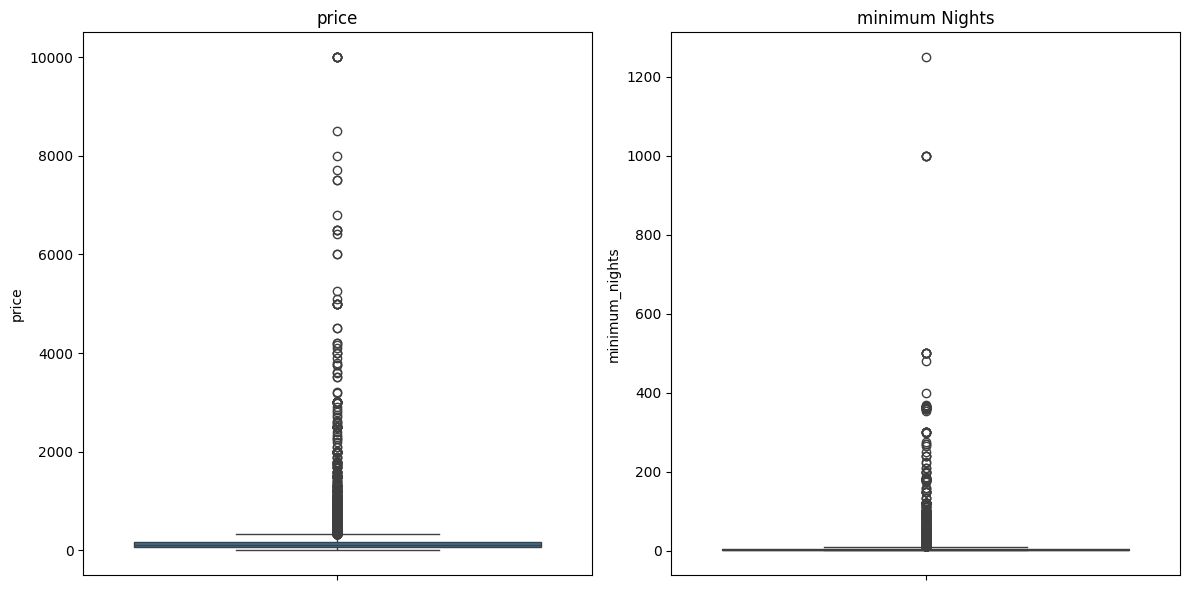

In [8]:
# Tamaño
plt.figure(figsize=(12, 6))
# uno para price y otro para minimum_nights
plt.subplot(1, 2, 1)
sns.boxplot(y=df["price"])
plt.title("price")
plt.subplot(1, 2, 2)
sns.boxplot(y=df["minimum_nights"])
plt.title("minimum Nights")

# graficos
plt.tight_layout()
plt.show()

-Price : La mayoría de los datos están agrupados en la parte baja de la escala, lo que indica que la mayoría de los alojamientos tienen precios bajos o moderados, hay muchos outliers en los precios, superando ampliamente el rango típico.

-minimun_nights : muchos valores extremos, la mayoria de los datos estan concentrados en valores pequeños, entre 1 y 10 noches, 

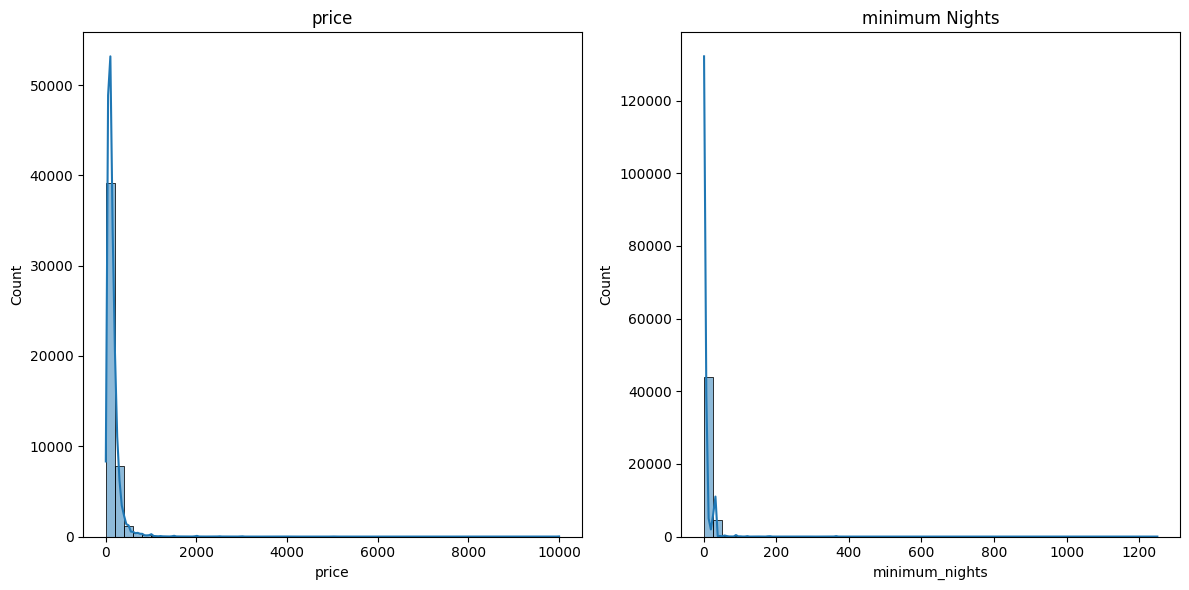

In [9]:
# tamaño
plt.figure(figsize=(12, 6))

# uno para price y otro para minimum_nights
plt.subplot(1, 2, 1)
sns.histplot(df["price"], bins=50, kde=True)
plt.title("price")
plt.subplot(1, 2, 2)
sns.histplot(df["minimum_nights"], bins=50, kde=True)
plt.title("minimum Nights")

# graficos
plt.tight_layout()
plt.show()

- price : La mayor parte de los precios están concentrados en valores bajos, lo que sugiere que la mayoría de los alojamientos tienen precios accesibles, La curva KDE muestra un pico fuerte en el rango bajo y luego una disminución brusca, lo que confirma la presencia de valores extremos.

- minimun_nights : la mayoria de los alojamientos rquieren pocas noches mínimas(entre 1 y 5 noches)

In [10]:
# numero total de valores nulos en cada columna
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Last_review, reviews_per_month confirman que muchos alojamientos no han recibido reseñas, name y host_name se podrian eliminar o relleñar.

In [11]:
# Eliminar filas con valores nulos.
df.dropna(subset=["name", "host_name"], inplace=True)

In [12]:
# Relleno con 0
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

In [13]:
# Relleno con "Sin reseñas"
df["last_review"] = df["last_review"].fillna("Sin reseñas")
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

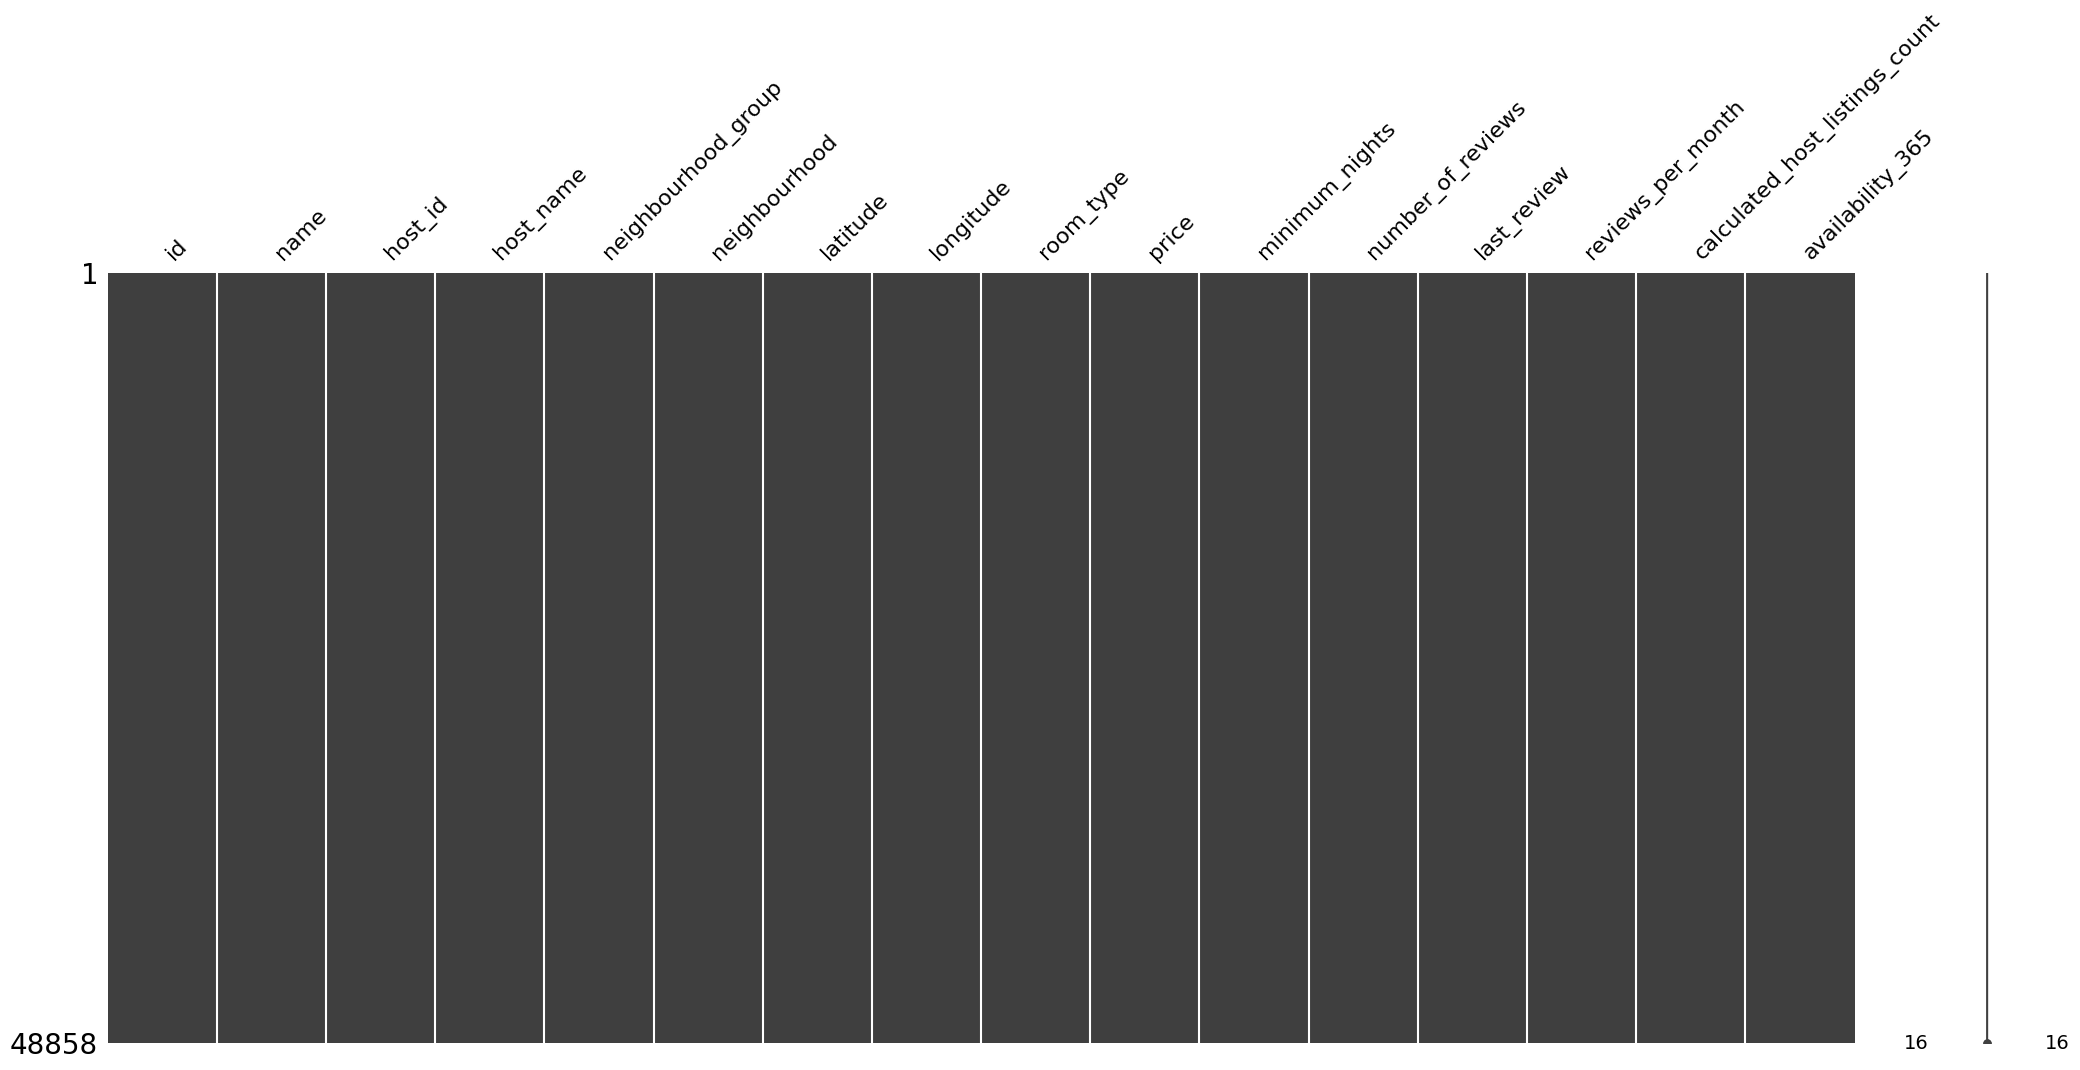

In [14]:
# Matriz de valores nulos
msno.matrix(df)
plt.show()

In [15]:
# train y test.
X = df.drop(columns=["price"])  # Todas las columnas excepto price
y = df["price"]  # variable objetivo

# Entrenamiento (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Entrenamiento----->", X_train.shape)
print("Prueba----->", X_test.shape)

Entrenamiento-----> (39086, 15)
Prueba-----> (9772, 15)


In [16]:
print(X_train.dtypes)
print(y_train.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object
int64


In [17]:
# Convertir columnas  categoricas en variables ( 0 y 1)
X_train = pd.get_dummies(X_train, columns=["room_type", "neighbourhood_group"], drop_first=True)
X_test = pd.get_dummies(X_test, columns=["room_type", "neighbourhood_group"], drop_first=True)

In [18]:
# Elimina columnas innecesarias 
X_train = X_train.drop(columns=["name", "host_name", "neighbourhood", "last_review"])
X_test = X_test.drop(columns=["name", "host_name", "neighbourhood", "last_review"])
print(X_train.dtypes)

id                                     int64
host_id                                int64
latitude                             float64
longitude                            float64
minimum_nights                         int64
number_of_reviews                      int64
reviews_per_month                    float64
calculated_host_listings_count         int64
availability_365                       int64
room_type_Private room                  bool
room_type_Shared room                   bool
neighbourhood_group_Brooklyn            bool
neighbourhood_group_Manhattan           bool
neighbourhood_group_Queens              bool
neighbourhood_group_Staten Island       bool
dtype: object


In [19]:
# Convertir solo las columnas booleanas a int
bool_cols = X_train.select_dtypes(include=["bool"]).columns
X_train[bool_cols] = X_train[bool_cols].astype(int)
X_test[bool_cols] = X_test[bool_cols].astype(int)

# Verificar tipos de datos después de la conversión
print(X_train.dtypes)

id                                     int64
host_id                                int64
latitude                             float64
longitude                            float64
minimum_nights                         int64
number_of_reviews                      int64
reviews_per_month                    float64
calculated_host_listings_count         int64
availability_365                       int64
room_type_Private room                 int64
room_type_Shared room                  int64
neighbourhood_group_Brooklyn           int64
neighbourhood_group_Manhattan          int64
neighbourhood_group_Queens             int64
neighbourhood_group_Staten Island      int64
dtype: object


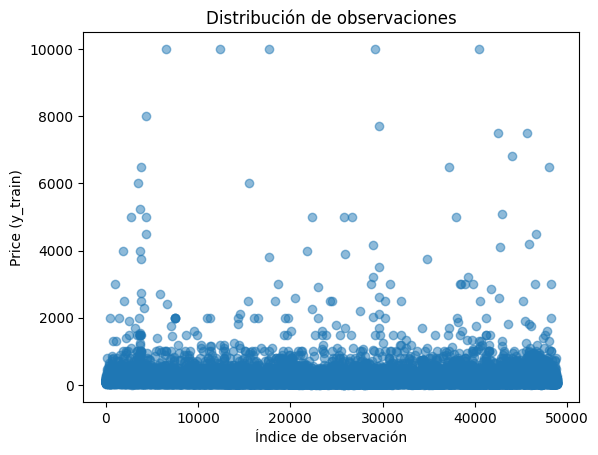

In [20]:
plt.scatter(X_train.index, y_train, alpha=0.5)
plt.xlabel('Índice de observación')
plt.ylabel('Price (y_train)')
plt.title('Distribución de observaciones')
plt.show()

Concentracion en precios bajos, presencia de valores extremos, sesgos en la distribucion, es posible que se necesite normalizar o eliminar outliers.

In [21]:
# Calcular rango intercuartil (IQR)
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

# Definir umbral de observaciones atípicas
pto_corte = 25.0 * IQR  # Se usa 25.0 veces el IQR para detectar valores extremos

# Filtrar observaciones influyentes
observaciones_influyentes = X_train[((X_train < (Q1 - pto_corte)) | (X_train > (Q3 + pto_corte))).any(axis=1)]
print("Nº de observaciones influyentes:", len(observaciones_influyentes))
print(observaciones_influyentes)

Nº de observaciones influyentes: 7219
             id    host_id  latitude  longitude  minimum_nights  \
43820  33899850   27260699  40.69606  -73.90950               1   
14138  10851925    8573805  40.70384  -73.91145               7   
42615  33077121    4037192  40.72355  -73.87456              30   
30622  23685538   37286422  40.70739  -73.81327               2   
40868  31763495   52577963  40.69054  -73.84812               5   
...         ...        ...       ...        ...             ...   
2749    1486099    7503643  40.72267  -73.94362              30   
41471  32241019  219517861  40.70751  -74.01184               2   
19798  15855156   40503875  40.75927  -73.90920               1   
1686     765203    2276842  40.70745  -73.94307               3   
16049  12972783   68139551  40.72143  -73.89320               1   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
43820                  4               1.71                               4   

Menor cantidad de valores extremos a medida que aumente el umbral, presencia de ciertos aoutliers: miles de registros considerados extremos, impacto de variables como: minimum_nights, reviews_per_month y calculated_host_listings_count: Estas columnas siguen influyendo en la detección de valores extremos, lo que sugiere que tienen una distribución sesgada.

In [22]:
# Definir umbral basado en desviación estándar
pto_corte = 2  # Umbral de influencia (ajustable)
std_threshold = X_train.std() * pto_corte  # Multiplicamos por 2 para detectar valores extremos

# Detectar índices de observaciones atípicas
indices_influyentes = np.where((X_train > (X_train.mean() + std_threshold)) | 
                               (X_train < (X_train.mean() - std_threshold)))[0]
print("Número de observaciones influyentes:", len(indices_influyentes))
print("Índices de observaciones influyentes:", indices_influyentes)

Número de observaciones influyentes: 18007
Índices de observaciones influyentes: [    6     9    12 ... 39075 39082 39084]


In [23]:
X_train.iloc[indices_influyentes]

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
43586,33740789,144863350,40.81482,-73.95192,1,12,4.34,1,0,1,0,0,1,0,0
43820,33899850,27260699,40.69606,-73.90950,1,4,1.71,4,53,0,1,1,0,0,0
14138,10851925,8573805,40.70384,-73.91145,7,0,0.00,1,0,1,0,0,0,1,0
42615,33077121,4037192,40.72355,-73.87456,30,1,0.77,1,323,0,0,0,0,1,0
30622,23685538,37286422,40.70739,-73.81327,2,18,1.15,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,765203,2276842,40.70745,-73.94307,3,19,0.44,2,88,0,1,1,0,0,0
16049,12972783,68139551,40.72143,-73.89320,1,37,0.97,3,364,1,0,0,0,1,0
44168,34085559,255431206,40.65144,-73.94489,7,0,0.00,9,126,1,0,1,0,0,0
44769,34393812,95688223,40.67436,-73.96704,4,6,5.29,1,92,0,0,1,0,0,0


Pesistencia en valores extremos.
Variablilidad en minimun_nights: minimos de noches muy bajos(1 o 2), mientras otros llegan hasta 30 noches.
Diversidad en reviews_per_month: hay listados con cero reseñas.
Alta concentracio nen ciertas áreas: neighbourhood_group_Brooklyn y Manhattan en varias filas sugiere que estos barrios dominan la oferta de alojamientos.

In [24]:
# Porcentaje de viviendas influyentes
porcentaje = len(indices_influyentes) / len(X_train) * 100
print(f'Porcentaje de viviendas a desestimar: {porcentaje:.2f}%')

Porcentaje de viviendas a desestimar: 46.07%


In [25]:
# Obtener los índices en el dataset original
idx_original = X_train.index[indices_influyentes]
print("Índices originales de viviendas influyentes:", idx_original)

Índices originales de viviendas influyentes: Index([43586, 43820, 14138, 42615, 30622, 30622, 24983, 28627, 40868, 40868,
       ...
       19146, 41471, 19798, 17595, 37855,  1686, 16049, 44168, 44769,   861],
      dtype='int64', length=18007)


In [26]:
# Convertimos los índices influyentes a int.
indices_influyentes = [int(idx) for idx in indices_influyentes]
#Eliminar observaciones influyentes de X_train.
X_train1 = X_train.drop(index=indices_influyentes, errors='ignore')
y_train1 = y_train.loc[X_train1.index]  # Mantener los mismos índices en y_train
# Verificar tamaño después de la eliminación
print("Tamaño original de X_train:", X_train.shape)
print("Tamaño filtrado de X_train1:", X_train1.shape)
print("Tamaño original de y_train:", y_train.shape)
print("Tamaño filtrado de y_train1:", y_train1.shape)

Tamaño original de X_train: (39086, 15)
Tamaño filtrado de X_train1: (28709, 15)
Tamaño original de y_train: (39086,)
Tamaño filtrado de y_train1: (28709,)


Eliminar las observaciones influyentes, mantener las alineaciones de los datos, que X_train y y_train sean compatibles para la regresion, verificar que los datasets cambian correctamente.

In [27]:
# Calcular el VIF para cada variable en X_train1
vif = pd.DataFrame()
vif["Variable"] = X_train1.columns
vif["VIF"] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
print(vif)

                             Variable           VIF
0                                  id  1.916022e+00
1                             host_id  2.935919e+00
2                            latitude  1.802052e+00
3                           longitude  1.009875e+06
4                      minimum_nights  1.061763e+00
5                   number_of_reviews  2.027874e+00
6                   reviews_per_month  1.855717e+00
7      calculated_host_listings_count  1.148605e+00
8                    availability_365  1.185530e+00
9              room_type_Private room  1.093805e+00
10              room_type_Shared room  1.038286e+00
11       neighbourhood_group_Brooklyn  1.673039e+01
12      neighbourhood_group_Manhattan  1.373142e+01
13         neighbourhood_group_Queens  6.064881e+00
14  neighbourhood_group_Staten Island  1.952503e+00


In [28]:
# Lista de columnas a eliminar en función del análisis del VIF
columnas_a_eliminar = ["id", "host_id", "latitude", "neighbourhood_group_Brooklyn", 
                        "neighbourhood_group_Manhattan", "DISTANCE_TO_CITY_CENTER",
                        "reviews_per_month"]

# Eliminar todas las columnas innecesarias
X_train_refinado = X_train1.drop(columns=columnas_a_eliminar, errors='ignore')
X_test_refinado = X_test.drop(columns=columnas_a_eliminar, errors='ignore')

# Agregar constante para la regresión, pero sin ajustar el modelo
X_train_const_refined = sm.add_constant(X_train_refinado, has_constant="add")
X_test_const_refined = sm.add_constant(X_test_refinado, has_constant="add")

# Mostrar el conjunto de datos refinado
print("Dimensiones de X_train_refinado:", X_train_const_refined.shape)
print("Dimensiones de X_test_refinado:", X_test_const_refined.shape)
print(X_train_const_refined.head())

Dimensiones de X_train_refinado: (28709, 10)
Dimensiones de X_test_refinado: (9772, 10)
       const  longitude  minimum_nights  number_of_reviews  \
24040    1.0  -73.95581              30                  9   
16721    1.0  -73.94689               3                 46   
31144    1.0  -73.93352               2                  3   
43586    1.0  -73.95192               1                 12   
23439    1.0  -74.00106               3                 13   

       calculated_host_listings_count  availability_365  \
24040                              16               340   
16721                               3               297   
31144                               4                54   
43586                               1                 0   
23439                               1                64   

       room_type_Private room  room_type_Shared room  \
24040                       0                      0   
16721                       0                      0   
31144           

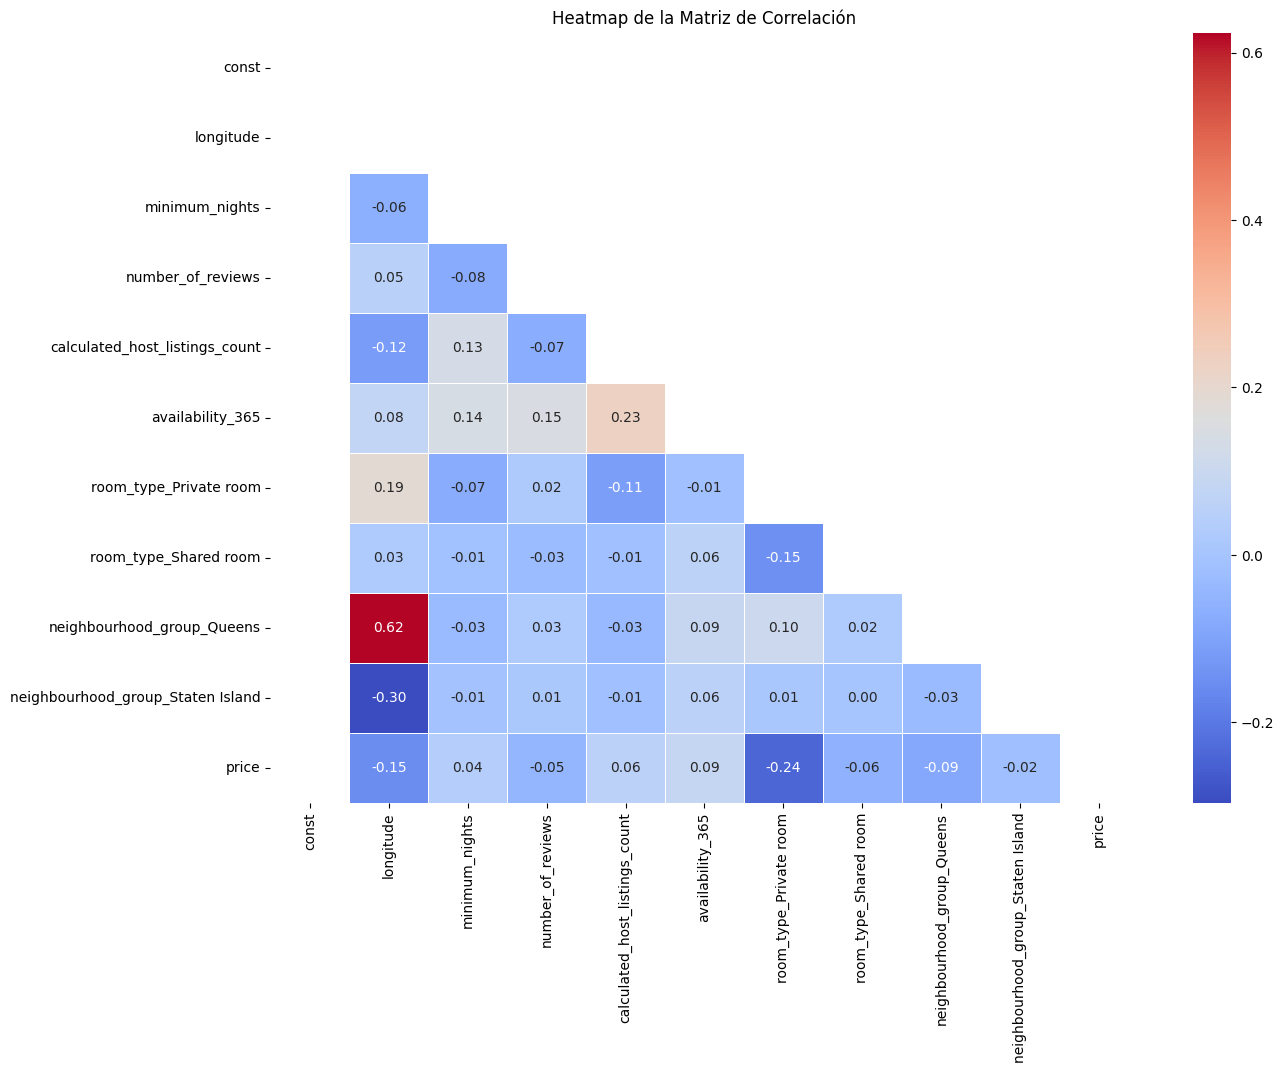

In [29]:
# Crear copia del dataset de entrenamiento y agregar la variable objetivo
X_corr = X_train_const_refined.copy()
X_corr['price'] = y_train1  #'price' para analizar su correlación con las demás variables
# Matriz de correlación
corr_matrix = X_corr.corr()
# Máscara para ocultar valores redundantes
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Tamaño
plt.figure(figsize=(14, 10))
# Heatmap de la matriz de correlación
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Heatmap de la Matriz de Correlación")
plt.show()

In [30]:
# Escalar
scaler = MinMaxScaler()

# Aplicar el escalado antes de agregar la constante
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train_const_refined), columns=X_train_const_refined.columns, index=X_train_const_refined.index)
X_test_sc = pd.DataFrame(scaler.transform(X_test_const_refined), columns=X_test_const_refined.columns, index=X_test_const_refined.index)
print("Dimensiones de X_train escalado:", X_train_sc.shape)
print("Dimensiones de X_test escalado:", X_test_sc.shape)
print(X_train_sc.head())

Dimensiones de X_train escalado: (28709, 10)
Dimensiones de X_test escalado: (9772, 10)
       const  longitude  minimum_nights  number_of_reviews  \
24040    0.0   0.543082        0.029058           0.014827   
16721    0.0   0.559867        0.002004           0.075783   
31144    0.0   0.585025        0.001002           0.004942   
43586    0.0   0.550402        0.000000           0.019769   
23439    0.0   0.457934        0.002004           0.021417   

       calculated_host_listings_count  availability_365  \
24040                        0.046012          0.931507   
16721                        0.006135          0.813699   
31144                        0.009202          0.147945   
43586                        0.000000          0.000000   
23439                        0.000000          0.175342   

       room_type_Private room  room_type_Shared room  \
24040                     0.0                    0.0   
16721                     0.0                    0.0   
31144           

In [31]:
X_train_const_refined.shape

(28709, 10)

In [32]:
X_train_const_refined.columns

Index(['const', 'longitude', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365',
       'room_type_Private room', 'room_type_Shared room',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island'],
      dtype='object')

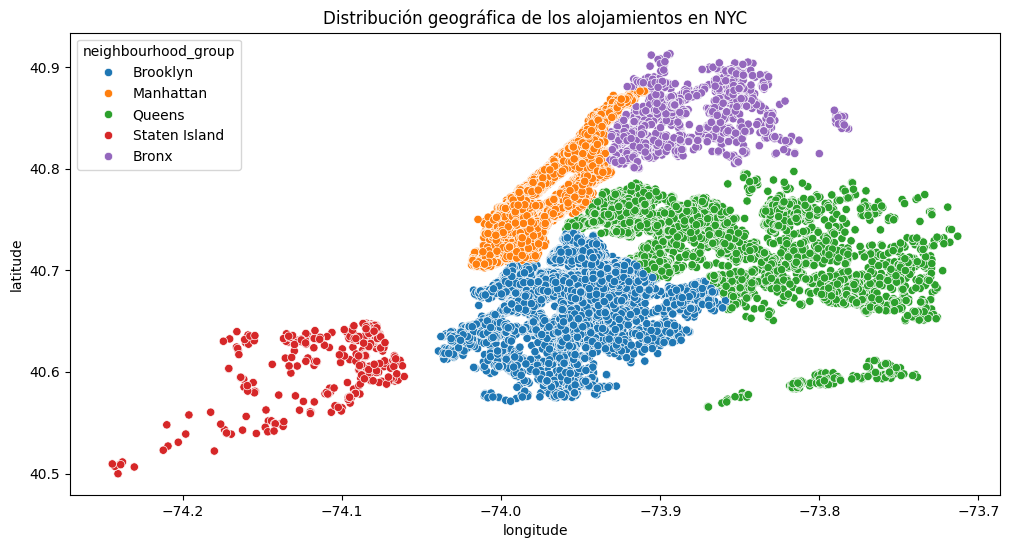

In [33]:
# Análisis de ubicaciones
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['neighbourhood_group'])
plt.title("Distribución geográfica de los alojamientos en NYC")
plt.show()